# Import packages

In [5]:
# imported packages
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
import scipy.special
import scipy.integrate as it
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.stats import kde
import copy
import glob, os
import re
# from sklearn import datasets, linear_model
import pandas as pd
from decimal import *
from operator import itemgetter    
from collections import OrderedDict
import timeit


In [6]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [7]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'
# yellow = '#ffffd4'

In [8]:
axisfont=13
titlefont=20
subtitlefont = 15
axislabelfont=15
legendfont = 11
tpfont = 12

In [9]:
# panel sizes
Bolton_v3panel_size = 896665  # bp
Bolton_v5panel_size = 1016478  # bp
Bolton_v6panel_size = 1139322  # bp
# 'v3' : 896665,
# 'v5' : 1016478,
# 'v6' : 1139322

nonsynonymous_mu_per_bp = 1.3475177304964539e-09
synonymous_mu_per_bp = 6.028368794326241e-10
Bolton_v3panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_v3panel_size
Bolton_v5panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_v5panel_size
Bolton_v6panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_v6panel_size


### Import Bolton data 

In [11]:
# setting up Bolton untreated patients ID dictionary
import csv
filename="Bolton_published_patient_information.csv"

Untreated_patients_dictionary = {}

with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['Patient ID']
        treatment_status = str(row['Treatment Status'])
        age = float(row['Age'])

        if treatment_status == 'Untreated' and patient_id not in Untreated_patients_dictionary.keys():
            Untreated_patients_dictionary[patient_id]=age

print('Number of unique untreated patients', len(Untreated_patients_dictionary.keys()))

list_of_Bolton_ages = list(Untreated_patients_dictionary.values())
    
    
Boltontotal=len(Untreated_patients_dictionary.keys())


Number of unique untreated patients 4160


In [12]:
# only import Bolton nonsynonymous SNVs
filename = 'Bolton_nonsynonymous_SNVs_untreated_patients_from_4160_cohort.csv'

all_panels_non_syn_data = []
Bolton_non_syn_SNV_gene_dictionary = {}
trimming_upper_limit = 0.5
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        mutation_type = row['VariantClass']
        gene = row['Gene']
        VAF = float(row['N_AltFreq'])
        
        if patient_id in Untreated_patients_dictionary.keys():
            if mutation_type == 'Missense_Mutation' or mutation_type == 'Nonsense_Mutation':
                if VAF < trimming_upper_limit:
                    all_panels_non_syn_data.append(VAF)

                    if gene not in Bolton_non_syn_SNV_gene_dictionary.keys():
                        Bolton_non_syn_SNV_gene_dictionary[gene]= [VAF]
                    else:
                        tmp_list = Bolton_non_syn_SNV_gene_dictionary[gene]
                        tmp_list.append(VAF)
                        Bolton_non_syn_SNV_gene_dictionary[gene]= tmp_list

print('Number of untreated patients', len(Untreated_patients_dictionary.keys()))
print('Number of nonsynonymous variants detected in untreated patients', len(all_panels_non_syn_data))

count_mutation_frequency = {}
for gene, list_of_vaf in Bolton_non_syn_SNV_gene_dictionary.items():
    count_mutation_frequency[gene] = len(list_of_vaf)
#     print('Gene', gene, 'mutated', len(list_of_vaf), 'many times.')
count_mutation_frequency_in_order = dict(sorted(count_mutation_frequency.items(), key=lambda item: item[1]))
list_of_genes_in_Bolton_nonsny_mutation_freq_order = list(count_mutation_frequency_in_order.keys())[::-1]
print('list_of_genes_in_Bolton_nonsny_mutation_freq_order', list_of_genes_in_Bolton_nonsny_mutation_freq_order)
print('list_of_genes_in_Bolton_nonsny_mutation_freq_order', len(list_of_genes_in_Bolton_nonsny_mutation_freq_order))

Number of untreated patients 4160
Number of nonsynonymous variants detected in untreated patients 1236
list_of_genes_in_Bolton_nonsny_mutation_freq_order ['DNMT3A', 'TET2', 'PPM1D', 'SF3B1', 'ATM', 'ASXL1', 'JAK2', 'TP53', 'SRSF2', 'CHEK2', 'EGFR', 'CBL', 'U2AF1', 'TSC2', 'GRIN2A', 'SH2B3', 'MED12', 'NF1', 'KMT2C', 'RAD21', 'PTPRS', 'FAT1', 'EPHA5', 'SPEN', 'BRCA2', 'POLE', 'ATRX', 'STAT5B', 'RPTOR', 'NOTCH4', 'PTCH1', 'PBRM1', 'NOTCH3', 'ARID1B', 'DNMT3B', 'KDM5A', 'MET', 'MGA', 'EPHA3', 'BRCA1', 'PTPRT', 'GNAS', 'STAT3', 'IDH2', 'EP300', 'RBM10', 'TERT', 'KDM5C', 'PREX2', 'SLX4', 'MST1R', 'HLA-B', 'CUL3', 'ARID2', 'RICTOR', 'POLD1', 'KDM6A', 'CTCF', 'STAG2', 'KMT2A', 'PLCG2', 'BCOR', 'KDR', 'EZH2', 'APC', 'ZRSR2', 'MDC1', 'CDK12', 'FLT3', 'DICER1', 'KMT2D', 'KRAS', 'ANKRD11', 'MST1', 'ROS1', 'FH', 'TGFBR1', 'CREBBP', 'ERBB3', 'FGFR1', 'IRS2', 'ARID1A', 'NOTCH1', 'PMS2', 'BRD4', 'ERBB2', 'FGF3', 'EPHA7', 'RPS6KA4', 'ABL1', 'ALK', 'CXCR4', 'FLT1', 'PAX5', 'GLI1', 'MTOR', 'CARD11', 'MPL

In [13]:
# import Bolton synonymous SNVs
filename = 'Bolton_synonymous_SNVs_untreated_patients_from_4160_cohort.csv'

all_panels_syn_data = []
Bolton_syn_SNV_gene_dictionary = {}
trimming_upper_limit = 0.5
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        mutation_type = row['VariantClass']
        gene = row['Gene']
        VAF = float(row['N_AltFreq'])
        
        if patient_id in Untreated_patients_dictionary.keys():
            if mutation_type == 'Silent':
                if VAF < trimming_upper_limit:
                    all_panels_syn_data.append(VAF)

                    if gene not in Bolton_syn_SNV_gene_dictionary.keys():
                        Bolton_syn_SNV_gene_dictionary[gene]= [VAF]
                    else:
                        tmp_list = Bolton_syn_SNV_gene_dictionary[gene]
                        tmp_list.append(VAF)
                        Bolton_syn_SNV_gene_dictionary[gene]= tmp_list

print('Number of untreated patients', len(Untreated_patients_dictionary.keys()))
print('Number of synonymous variants detected in untreated patients', len(all_panels_syn_data))



Number of untreated patients 4160
Number of synonymous variants detected in untreated patients 233


In [14]:
# create dictionary according to gene SNV mutation frequency
filename = 'Bolton_all_SNVs_untreated_patients_from_4160_cohort.csv'

all_panels_SNV_data = []
Bolton_all_SNV_gene_dictionary = {}
trimming_upper_limit = 0.5
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        mutation_type = row['VariantClass']
        gene = row['Gene']
        VAF = float(row['N_AltFreq'])
        
        if patient_id in Untreated_patients_dictionary.keys():
            if mutation_type == 'Missense_Mutation' or mutation_type == 'Nonsense_Mutation' or mutation_type == 'Silent':
                if VAF < trimming_upper_limit:
                    all_panels_SNV_data.append(VAF)

                    if gene not in Bolton_all_SNV_gene_dictionary.keys():
                        Bolton_all_SNV_gene_dictionary[gene]= [VAF]
                    else:
                        tmp_list = Bolton_all_SNV_gene_dictionary[gene]
                        tmp_list.append(VAF)
                        Bolton_all_SNV_gene_dictionary[gene]= tmp_list

print('Number of untreated patients', len(Untreated_patients_dictionary.keys()))
print('Number of nonsynonymous+synonymous variants detected in untreated patients', len(all_panels_SNV_data))

count_mutation_frequency = {}
for gene, list_of_vaf in Bolton_all_SNV_gene_dictionary.items():
    count_mutation_frequency[gene] = len(list_of_vaf)
#     print('Gene', gene, 'mutated', len(list_of_vaf), 'many times.')
count_mutation_frequency_in_order = dict(sorted(count_mutation_frequency.items(), key=lambda item: item[1]))
list_of_genes_in_mutation_freq_order = list(count_mutation_frequency_in_order.keys())[::-1]
print('list_of_genes_in_mutation_freq_order', list_of_genes_in_mutation_freq_order)
print('list_of_genes_in_mutation_freq_order', len(list_of_genes_in_mutation_freq_order))


Number of untreated patients 4160
Number of nonsynonymous+synonymous variants detected in untreated patients 1469
list_of_genes_in_mutation_freq_order ['DNMT3A', 'TET2', 'PPM1D', 'SF3B1', 'ATM', 'ASXL1', 'JAK2', 'TP53', 'EGFR', 'SRSF2', 'GRIN2A', 'TSC2', 'CHEK2', 'PTPRS', 'CBL', 'KMT2C', 'U2AF1', 'FAT1', 'MET', 'MGA', 'MED12', 'SH2B3', 'EPHA5', 'KMT2A', 'RPTOR', 'PTPRT', 'NF1', 'PTCH1', 'KMT2D', 'BRCA2', 'ROS1', 'POLE', 'ATRX', 'EPHA3', 'RAD21', 'STAT5B', 'NOTCH4', 'NOTCH3', 'ALK', 'SPEN', 'ARID2', 'ARID1A', 'NOTCH1', 'DNMT3B', 'POLD1', 'ARID1B', 'BRCA1', 'CREBBP', 'KDR', 'EP300', 'PBRM1', 'FGFR2', 'TERT', 'PREX2', 'MST1R', 'SLX4', 'KDM5A', 'FLT4', 'KDM6A', 'ZFHX3', 'CTCF', 'PLCG2', 'GNAS', 'STAT3', 'IDH2', 'MDC1', 'CDK12', 'ANKRD11', 'FLT3', 'MPL', 'DICER1', 'RBM10', 'KDM5C', 'CIC', 'HLA-B', 'CUL3', 'ERBB3', 'PMS2', 'RICTOR', 'ERBB2', 'RPS6KA4', 'AXIN2', 'STAG2', 'NTRK1', 'FGFR3', 'BCOR', 'EZH2', 'APC', 'ERBB4', 'ZRSR2', 'TP63', 'FLT1', 'INPP4B', 'AR', 'PTPRD', 'TSHR', 'KRAS', 'MST1',

## Make gene lists based on gene rank by nonsyn. SNV occurrence

In [15]:
# # create lists for top x genes
# top_1_gene_nonsyn_SNV_vaf = []
# for i in range(1):
#     gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
#     list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
#     for vaf in list_of_vaf_this_gene:
#         top_1_gene_nonsyn_SNV_vaf.append(vaf)
# print('top_1_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_1_gene_nonsyn_SNV_vaf))

# top_3_gene_nonsyn_SNV_vaf = []
# for i in range(3):
#     gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
#     list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
#     for vaf in list_of_vaf_this_gene:
#         top_3_gene_nonsyn_SNV_vaf.append(vaf)
# print('top_3_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_3_gene_nonsyn_SNV_vaf))

# top_10_gene_nonsyn_SNV_vaf = []
# for i in range(10):
#     gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
#     list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
#     for vaf in list_of_vaf_this_gene:
#         top_10_gene_nonsyn_SNV_vaf.append(vaf)
# print('top_10_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_10_gene_nonsyn_SNV_vaf))

# top_30_gene_nonsyn_SNV_vaf = []
# for i in range(30):
#     gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
#     list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
#     for vaf in list_of_vaf_this_gene:
#         top_30_gene_nonsyn_SNV_vaf.append(vaf)
# print('top_30_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_30_gene_nonsyn_SNV_vaf))


In [16]:
# # create lists for top x genes
# top_50_gene_nonsyn_SNV_vaf = []
# for i in range(50):
#     gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
#     list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
#     for vaf in list_of_vaf_this_gene:
#         top_50_gene_nonsyn_SNV_vaf.append(vaf)
# print('top_50_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_50_gene_nonsyn_SNV_vaf))

# top_100_gene_nonsyn_SNV_vaf = []
# for i in range(100):
#     gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
#     list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
#     for vaf in list_of_vaf_this_gene:
#         top_100_gene_nonsyn_SNV_vaf.append(vaf)
# print('top_100_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_100_gene_nonsyn_SNV_vaf))

# top_200_gene_nonsyn_SNV_vaf = []
# for i in range(200):
#     gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
#     list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
#     for vaf in list_of_vaf_this_gene:
#         top_200_gene_nonsyn_SNV_vaf.append(vaf)
# print('top_200_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_200_gene_nonsyn_SNV_vaf))

# top_291_gene_nonsyn_SNV_vaf = []
# for i in range(291):
#     gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
#     list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
#     for vaf in list_of_vaf_this_gene:
#         top_291_gene_nonsyn_SNV_vaf.append(vaf)
# print('top_291_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_291_gene_nonsyn_SNV_vaf))



In [17]:
# create dictionary of lists for top x genes for x = 1-100
top_x_gene_nonsyn_SNV_vaf_dict = {}
for x in range(101):
    top_x_gene_nonsyn_SNV_vaf = []
    for i in range(x):
        gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
        list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
        for vaf in list_of_vaf_this_gene:
            top_x_gene_nonsyn_SNV_vaf.append(vaf)
#     print('top_x_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_x_gene_nonsyn_SNV_vaf))
    top_x_gene_nonsyn_SNV_vaf_dict[x] = top_x_gene_nonsyn_SNV_vaf
    
# create dictionary of lists for all 291 genes
for x in [291]:
    top_x_gene_nonsyn_SNV_vaf = []
    for i in range(x):
        gene_name = list_of_genes_in_Bolton_nonsny_mutation_freq_order[i]
        list_of_vaf_this_gene = Bolton_non_syn_SNV_gene_dictionary[gene_name]
        for vaf in list_of_vaf_this_gene:
            top_x_gene_nonsyn_SNV_vaf.append(vaf)
#     print('top_x_gene_nonsyn_SNV_vaf has this no. of nonsyn SNVs', len(top_x_gene_nonsyn_SNV_vaf))
    top_x_gene_nonsyn_SNV_vaf_dict[x] = top_x_gene_nonsyn_SNV_vaf

### Calculate the coding region sizes for subsets of genes 

In [18]:
top_x_gene_name_list = {}
for x in range(101):
    top_x_gene_name_list[x] = list_of_genes_in_Bolton_nonsny_mutation_freq_order[0:x]
#     print('x',x,'length', len(top_x_gene_name_list[x]))
top_x_gene_name_list[100] = list_of_genes_in_Bolton_nonsny_mutation_freq_order[0:100]
top_x_gene_name_list[291] = list_of_genes_in_Bolton_nonsny_mutation_freq_order[0:291]


In [19]:
# these are the subsets of genes we consider
list_of_x = list(range(101))
list_of_x.append(291)
# list_of_x.append(468)
print(list_of_x)
top_x_gene_CCDS_total_length = {}

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 291]


In [19]:
import pyensembl
from pyensembl import EnsemblRelease

# import CCDS
from pyensembl import EnsemblRelease

# release 77 uses human reference genome GRCh38
# reference_assemblies={'GRCh38': (76, 97), 'GRCh37': (55, 75)}
release_76 = EnsemblRelease(76)
release_75 = EnsemblRelease(75)

for x in list_of_x:
    genes_concerned = top_x_gene_name_list[x]
    combined_CCDS_length = 0

    for gene in genes_concerned:

        if gene in genes_with_alternative_names.keys():
            gene = genes_with_alternative_names[gene]
        # gene = 'DNMT3A'
        canonical_CCDS_length = 0

        list_of_transcripts_of_this_gene = release_75.transcript_ids_of_gene_name(gene)
#         print(list_of_transcripts_of_this_gene)
        # print(release_76.transcript_by_id('ENST00000264709'))
        for ID in list_of_transcripts_of_this_gene:

            retrieve_transcript_by_ID = release_75.transcript_by_id(ID)
    #         print(retrieve_transcript_by_ID)
            try:
                transcript_id = retrieve_transcript_by_ID.transcript_id
                transcript_name = retrieve_transcript_by_ID.transcript_name
                gene_id = retrieve_transcript_by_ID.gene_id
                biotype = retrieve_transcript_by_ID.biotype
                contig = retrieve_transcript_by_ID.contig
                start = retrieve_transcript_by_ID.start
                end = retrieve_transcript_by_ID.end
                strand = retrieve_transcript_by_ID.strand
                retrieve_Transcript = pyensembl.transcript.Transcript(transcript_id=transcript_id, transcript_name=transcript_name, gene_id=gene_id, biotype=biotype, \
                                                      contig=contig, start=start, end=end, strand=strand, genome= release_75)

                # CCDS of this transcript
                retrieved_CCDS = retrieve_Transcript.coding_sequence
    #             print('\nlength of this transcript ID:', ID,'is', len(retrieved_CCDS))
                if canonical_CCDS_length < len(retrieved_CCDS):
                    canonical_CCDS_length = len(retrieved_CCDS)


            except:
                pass
    #             print('\n', ID, 'does not have complete CCDS information')


#         print("\nthe longest CCDS corresponding to gene", gene, 'is ', canonical_CCDS_length,'nucleotides long.')

        if canonical_CCDS_length == 0:
            print('\n Gene', gene, 'has no CCDS')

        combined_CCDS_length = combined_CCDS_length + canonical_CCDS_length

#     print('combined_CCDS_length', combined_CCDS_length)

    top_x_gene_CCDS_total_length[x] = combined_CCDS_length

INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.ncrna.fa.gz.pickle


In [20]:
# top_x_gene_CCDS_total_length = {0: 0, 1: 2739, 2: 8811, 3: 10629, 4: 14544, 5: 23715, 6: 28341, 7: 31740, 8: 32922, 9: 33588, 10: 35349, 11: 38982, 12: 41703, 13: 42426, 14: 47850, 15: 52245, 16: 53973, 17: 60516, 18: 69036, 19: 83943, 20: 85839, 21: 91689, 22: 105456, 23: 108570, 24: 119565, 25: 129822, 26: 136683, 27: 144162, 28: 146526, 29: 150534, 30: 156552, 31: 160896, 32: 165966, 33: 172932, 34: 179802, 35: 182364, 36: 187437, 37: 191664, 38: 200862, 39: 203814, 40: 209469, 41: 213852, 42: 216966, 43: 219279, 44: 220638, 45: 227883, 46: 230676, 47: 234075, 48: 238758, 49: 243579, 50: 249084, 51: 253287, 52: 254376, 53: 256683, 54: 262191, 55: 267390, 56: 270792, 57: 275019, 58: 277203, 59: 281010, 60: 292929, 61: 296727, 62: 301995, 63: 306066, 64: 308322, 65: 316854, 66: 318303, 67: 324573, 68: 329046, 69: 332037, 70: 337806, 71: 354420, 72: 354990, 73: 362982, 74: 365160, 75: 372204, 76: 373737, 77: 375261, 78: 382590, 79: 386619, 80: 389181, 81: 393198, 82: 400056, 83: 407724, 84: 410313, 85: 414402, 86: 418170, 87: 418890, 88: 421887, 89: 424206, 90: 427599, 91: 432462, 92: 433533, 93: 437550, 94: 438726, 95: 442047, 96: 449697, 97: 453162, 98: 455070, 99: 457887, 100: 461448, 291: 903258}

print(top_x_gene_CCDS_total_length)

{0: 0, 1: 2739, 2: 8811, 3: 10629, 4: 14544, 5: 23715, 6: 28341, 7: 31740, 8: 32922, 9: 33588, 10: 35349, 11: 38982, 12: 41703, 13: 42426, 14: 47850, 15: 52245, 16: 53973, 17: 60516, 18: 69036, 19: 83943, 20: 85839, 21: 91689, 22: 105456, 23: 108570, 24: 119565, 25: 129822, 26: 136683, 27: 144162, 28: 146526, 29: 150534, 30: 156552, 31: 160896, 32: 165966, 33: 172932, 34: 179802, 35: 182364, 36: 187437, 37: 191664, 38: 200862, 39: 203814, 40: 209469, 41: 213852, 42: 216966, 43: 219279, 44: 220638, 45: 227883, 46: 230676, 47: 234075, 48: 238758, 49: 243579, 50: 249084, 51: 253287, 52: 254376, 53: 256683, 54: 262191, 55: 267390, 56: 270792, 57: 275019, 58: 277203, 59: 281010, 60: 292929, 61: 296727, 62: 301995, 63: 306066, 64: 308322, 65: 316854, 66: 318303, 67: 324573, 68: 329046, 69: 332037, 70: 337806, 71: 354420, 72: 354990, 73: 362982, 74: 365160, 75: 372204, 76: 373737, 77: 375261, 78: 382590, 79: 386619, 80: 389181, 81: 393198, 82: 400056, 83: 407724, 84: 410313, 85: 414402, 86: 4

## Functions for plotting histograms

In [20]:
binmethod = 'doane'

m_size = 14
Boltonmarkersize = m_size*1
Razavimarkersize = m_size*1
Coombsmarkersize = m_size*1.2
Youngmarkersize = m_size*1.2
Desaimarkersize = m_size*1.5
Jaiswalmarkersize = m_size*1.2
Genovesemarkersize = m_size*1.1

line_width = 6
a = 0.75

In [21]:
def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err

In [22]:
def log_hist_data_for_plot(study_VAFs, study_total, study_mu, bin_size):
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total*2*study_mu
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
    hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
    errors = error_bars(hist, normed_value, widths)
    
    return bin_centres, log_hist_for_plot, errors

In [23]:

def plot_log_hist_data_for_plot_solid_smaller(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color):

    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total*2*study_mu
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
    ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1

def plot_log_hist_data_for_plot_solid_larger(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color, scale):
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total*2*study_mu
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
    hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
    errors = error_bars(hist, normed_value, widths)
    
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 12*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

    Jaiswalmarker = 'o'
    Zinkmarker = '^'
    Acunamarker = 'P'
    Coombsmarker = 'v'
    Youngmarker = 'p'
    Mckerrelmarker = 'D'
    Genovesemarker = 'd'
    Desaimarker = '*'

    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
             elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
             markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=0)
    
    # Set axis limits
    ax1.set_ylim(1, 14)
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('rescaled density', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(0.1), np.log(0.2), np.log(0.3), \
                     np.log(0.4), np.log(0.5), np.log(0.6), \
                     np.log(0.7), np.log(0.8), np.log(0.9), \
                     np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000),]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{0}$"\
                           "","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(scale)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    
    return ax1

def plot_log_hist_data_for_plot_solid(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color):
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total*2*study_mu
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
    hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
    errors = error_bars(hist, normed_value, widths)
    
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 12*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

    Jaiswalmarker = 'o'
    Zinkmarker = '^'
    Acunamarker = 'P'
    Coombsmarker = 'v'
    Youngmarker = 'p'
    Mckerrelmarker = 'D'
    Genovesemarker = 'd'
    Desaimarker = '*'

    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = color, \
             elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
             markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=0)
    
    # Set axis limits
    ax1.set_ylim(1, 14)
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('rescaled density', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000),]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(scale)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
  
    return ax1

In [24]:
def plot_log_hist_data_for_plot_solid_no_normalization(study_VAFs, study_total, bin_size, study_name, marker_name, marker_size, color):

    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
#     ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('density of variants \n(not normalized by panel sizes)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_ticks = [c-np.log(10**4) for c in y_major_ticks]
    y_major_tick_labels = ["$10^{-4}$","","", "", "", "", "", "", "", "$10^{-3}$","", "", "", "", "", "", "", "", \
                           "$10^{-2}$","", "", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

 
    return ax1


# Define theory functions

In [26]:
import scipy.special as sc

def hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver, s):
    
    N = N_tau

    expected_density=2*np.exp(l)*(2*N/(1-2*np.exp(l))**2)*N*u_driver/s**2/(2*N*np.exp(l)/(1-2*np.exp(l)))**2*\
    (np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*np.exp(-s*t))*np.exp(s*t)        -\
     np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s)*(np.exp(s*t)+ (2*N*np.exp(l)/(1-2*np.exp(l)))*s*(np.exp(s*t)-1)  ))

    return expected_density

def minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s):
    N=N_tau
    tau=1

    expected_density=2*np.exp(l)*N*tau*u_driver/(np.exp(l)*s*(1-2*np.exp(l)))*(-s*t*np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau)+sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau) -\
                                                   sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau*np.exp(-s*t)))
    

    return expected_density

def expected_density_hitchhiker_mutants_s_discrete(t, l, s1, mu_ben, N_tau):

#     psi = np.log(N_tau*s1+1)/s1
    relative_fitness=0.05
    psi = np.log((s1/relative_fitness-1)*N_tau*s1+1)/s1
    
    if t>psi:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, psi, mu_ben, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, mu_ben, s1)

    else:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, mu_ben, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, mu_ben, s1)
    
    return density

def linProbtheory_actual_ages_hitch_discrete(l, s1, mu_ben, N_tau, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_density_hitchhiker_mutants_s_discrete(age, l, s1, mu_ben, N_tau)/len(list_of_control_ages)
    
    
    return total_density

def expected_density_hitchhiker_mutants_s_single(t, l, s1, b, d, mu_ben, N_tau):
    
    u_driver_at_s1 = mu_ben*np.exp(-((abs(s1))/d)**b)/normalization

#     psi = np.log(N_tau*s1+1)/s1
    relative_fitness=0.05
    psi = np.log((s1/relative_fitness-1)*N_tau*s1+1)/s1
    
    if t>psi:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, psi, u_driver_at_s1, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, u_driver_at_s1, s1)

    else:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver_at_s1, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver_at_s1, s1)
    
    return density

def expected_number_hitchhiker_mutants(t, l, b, d, mu_ben, s_lower, s_upper, N_tau):
    
    result = integrate.quad(lambda s_var: expected_density_hitchhiker_mutants_s_single(t,  l, s_var,\
                                                                        b, d, mu_ben, N_tau), s_lower, s_upper)[0]

    return result

def linProbtheory_actual_ages_hitch(l, params, N_tau, s_lower, s_upper, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    b = 3
    d = 0.1
    mu_ben= params[0]
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_number_hitchhiker_mutants(age, l, b, d, mu_ben, s_lower, s_upper, N_tau)/len(list_of_control_ages)

    return total_density


In [27]:
def linProbtheory_ages_dev_not_normalized(l, u_dev):

    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)            

    return density

def logProbtheory_driver(l, haploid_driver_rate, N_tau, list_of_ages): 

    s_peak = 0.0
    b = p
    d = q
    s_max = float('inf')

    
    weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
#     print(s_max)
    normalization=integrate.quad(weight_s, 0.0, s_max)[0]
    normalized_rho_s= lambda s: (1/normalization)*np.exp(-((abs(s-s_peak))/d)**b)
    
    def rho(s):
        result = 0
        for t in list_of_ages:
            
            result = result + 2*haploid_driver_rate*normalized_rho_s(s)*N_tau/(1-2*np.exp(l))*np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))/len(list_of_ages)
       
        return result

    driver_contrib = integrate.quad(rho, 0.0, s_max)[0]
 
    return np.log(driver_contrib)


In [26]:
s_tolerance = 3.5/100
print('The DFE has a lower cutt off at s=', s_tolerance)

s_lower = s_tolerance
s_upper = 1

The DFE has a lower cutt off at s= 0.035


### choose N $\tau$

In [22]:
N_tau = 10**5

## Generate lists of normalised VAFs & normalised densities for maximum likelihood estimations

In [25]:
def lists_norm_VAFs_and_densities_no_normalization_by_panel(trimmed_VAF_list, study_total, binmethod):
    y = []
    for i in trimmed_VAF_list:
#         print(i)
        VAFs = np.log(float(i))
        y.append(VAFs)
    
    binmethod = 'doane'
    
    normed_value = study_total
    hist, bins = np.histogram(y, bins=binmethod, range=(min(y),max(y)))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
    hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)

    errors = error_bars(hist, normed_value, widths)
    
    VAF_densities=[]
    lower_error = []
    upper_error = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error)
    for a, b, c, d in VAF_densities_zip:
        VAF_densities.append((a, b, c, d))
        
    VAF_densities_without_inf = []    #remove the densities for the VAF bins for which there were no densities
    for i in VAF_densities:
        if i[1] != -(float('inf')):
            VAF_densities_without_inf.append(i)
    
    return VAF_densities_without_inf


In [33]:
def logProbtheory_actual_ages_nonsyn_delta_exp_power_p_free_q_free(l, list_of_ages, params, haploid_nonsyn_rate, N_tau, s_lower, s_upper, u_haploid_dev, fraction_of_drivers_that_matters, s_tolerance): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    s_peak = 0.0
    b = params[1]
    d = params[2]
#     driver rate
    haploid_driver_rate = params[0]
    s_max = float('inf')

    
    weight_s= lambda s: np.exp(-((abs(s))/d)**b)
#     print(s_max)
    normalization=integrate.quad(weight_s, 0.0, s_max)[0]
    
    if normalization != 0:
        normalized_rho_s= lambda s: (1/normalization)*np.exp(-((abs(s-s_peak))/d)**b)
    else:
        normalized_rho_s = lambda s: 0
    
    def rho(s):
        result = 0
        for t in list_of_ages:
#             no factor of 2 because data is normalized by 2mu
            result = result + 2*haploid_driver_rate*normalized_rho_s(s)*N_tau/(1-2*np.exp(l))*np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))/len(list_of_ages)
       
        return result

    driver_contrib = integrate.quad(rho, s_tolerance, s_max)[0]
    
#     fraction_of_drivers_that_matters_for_this_DFE = integrate.quad(weight_s, s_tolerance, s_max)[0]
#     nonsyn_haploid_passenger_rate = haploid_nonsyn_rate - haploid_driver_rate*fraction_of_drivers_that_matters_for_this_DFE
#     nonsyn_haploid_passenger_rate = haploid_nonsyn_rate - haploid_driver_rate*fraction_of_drivers_that_matters
    
#     if nonsyn_haploid_passenger_rate> 0:
#         HH_contrib = 2*nonsyn_haploid_passenger_rate*linProbtheory_actual_ages_hitch(l, [haploid_driver_rate], N_tau, s_tolerance, s_upper, list_of_ages)
#     else:
#         HH_contrib = 0
        
#     dev_contrib = linProbtheory_ages_dev_not_normalized(l, u_haploid_dev)
    
    return np.log(driver_contrib)

def logProbDataGivenModel_actual_ages_nonsyn_delta_exp_power_p_free_q_free(params, list_of_ages, data, N_tau, s_lower, s_upper, haploid_nonsyn_rate, u_haploid_dev, fraction_of_drivers_that_matters, s_tolerance): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    total_square_distance = 0
    for datapoint in data:
        if np.exp(datapoint[0])<0.5:
            logfreq = datapoint[0]
            predicted_log_density = logProbtheory_actual_ages_nonsyn_delta_exp_power_p_free_q_free_high_s_drivers_only(logfreq, list_of_ages,  params, haploid_nonsyn_rate, N_tau, s_lower, s_upper, u_haploid_dev, fraction_of_drivers_that_matters, s_tolerance)
            square_distance = ((datapoint[1] - predicted_log_density)**2)
            total_square_distance = total_square_distance + square_distance
                
    return total_square_distance 


In [31]:
 num_of_genes=291

In [34]:
#  p and q free: rough estimate without dev and HH contrib 

#Creating lists of the VAFs + VAF density lists (for MLE)  
top_x_gene_Bolton_nonsyn_SNV_vaf = top_x_gene_nonsyn_SNV_vaf_dict[num_of_genes]

Boltontotal=4160

# VAF densities lists
binmethod = 'doane'
n_bins_Bolton = 6

Bolton_top_x_genes_nonsyn_densities = lists_norm_VAFs_and_densities_no_normalization_by_panel(top_x_gene_Bolton_nonsyn_SNV_vaf, Boltontotal, n_bins_Bolton)

        
Bolton_top_x_genes_nonsyn_densities_without_inf = []    #remove the densities for the VAF bins for which there were no densities
for i in Bolton_top_x_genes_nonsyn_densities:
    if i[1] != -(float('inf')):
        Bolton_top_x_genes_nonsyn_densities_without_inf.append(i)

CCDS_of_top_x_genes = top_x_gene_CCDS_total_length[num_of_genes]

# This estimate is from Lee Six et al.
# NB:  if a mutation had mutant reads in greater than 120 out of 140 clonal
# colonies we considered it as germline
# Mutations that fell within 10 base pairs of each other or within 10 base pairs of
# indels were removed.
number_of_mutation_across_haploid_genome_per_cell_doubling = 1.84
# mappable genome size of GRCh37
haploid_genome_size = 2864785220
syn_total_mut_rate_ratio = 0.3090909090909091
Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix =  number_of_mutation_across_haploid_genome_per_cell_doubling*(CCDS_of_top_x_genes/haploid_genome_size)*(1-syn_total_mut_rate_ratio)
print('developmental mutation rate per cell doubling per haploid', Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix) 

nonsynonymous_mu_per_bp = 1.3475177304964539e-09
Bolton_top_x_nonsyn_rate = nonsynonymous_mu_per_bp*CCDS_of_top_x_genes


list_of_ages = list_of_Bolton_ages
initial_guess=[Bolton_top_x_nonsyn_rate, 3, 0.1]
outcome = scipy.optimize.minimize(logProbDataGivenModel_actual_ages_nonsyn_delta_exp_power_p_free_q_free, initial_guess,\
                        args=(list_of_ages, Bolton_top_x_genes_nonsyn_densities_without_inf, N_tau, \
                              s_lower, s_upper, 0, 0,\
                             fraction_of_drivers_that_matters, s_tolerance), method='Nelder-Mead',\
                        options = {'maxiter': 10000, 'maxfev': 10000}) 

best_fit_nonsyn_driver_rate = outcome.x[0]
best_fit_p = outcome.x[1]
best_fit_q = outcome.x[2]

print('free form best-fit',outcome)

developmental mutation rate per cell doubling per haploid 0.0004008283947691231


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log


free form best-fit  final_simplex: (array([[1.19206955e-05, 4.32504536e+00, 1.07014291e-01],
       [1.19206906e-05, 4.32503137e+00, 1.07014263e-01],
       [1.19209229e-05, 4.32496552e+00, 1.07013546e-01],
       [1.19203360e-05, 4.32510321e+00, 1.07015094e-01]]), array([0.32807529, 0.32807529, 0.32807529, 0.32807529]))
           fun: 0.32807529322706347
       message: 'Optimization terminated successfully.'
          nfev: 294
           nit: 172
        status: 0
       success: True
             x: array([1.19206955e-05, 4.32504536e+00, 1.07014291e-01])


best fit parameters = [1.19206955e-05, 4.32504536e+00, 1.07014291e-01] for DFE of observed drivers (all nonsyn. SNVs from 291 genes in Bolton et al.)

## Choose DFE (figure S7)

In [23]:
# Define DFE of drivers
p = 3
q = 0.1

weight_s= lambda s: np.exp(-((abs(s))/q)**p)
normalization=integrate.quad(weight_s, 0.0, float("inf"))[0]


In [27]:
from scipy.optimize import fsolve


Bolton_lower_limit = 0.02
Bolton_maximum_age = max(list_of_Bolton_ages)
print('Bolton_maximum_age', Bolton_maximum_age)
guess = 0.03
function = lambda s: (np.exp(s*Bolton_maximum_age)-1)/s - 2*N_tau*Bolton_lower_limit
fitness_threshold = fsolve(function, guess)

print('The fitness below which we do not detect is:', fitness_threshold)


# p = 3
# q = 0.1
# weight_s= lambda s: np.exp(-((abs(s))/q)**p)
# normalization=integrate.quad(weight_s, 0.0, float("inf"))[0]

def DFE(s):
    
    density = 10**-6*np.exp(-(s/q)**p)/normalization
   
    return density

all_fitness_fraction = integrate.quad(lambda s: DFE(s), 0, float('inf'))[0]
low_fitness_fraction = integrate.quad(lambda s: DFE(s), 0, s_tolerance)[0]
moderate_fitness_fraction = integrate.quad(lambda s: DFE(s), s_tolerance, fitness_threshold)[0]
high_fitness_fraction = integrate.quad(lambda s: DFE(s), fitness_threshold, float('inf'))[0]
print('low_fitness_fraction', low_fitness_fraction/all_fitness_fraction,\
      'moderate_fitness_fraction', moderate_fitness_fraction/all_fitness_fraction,\
      'high_fitness_fraction', high_fitness_fraction/all_fitness_fraction)

fraction_of_drivers_that_matters = (moderate_fitness_fraction+high_fitness_fraction)/all_fitness_fraction
print('fraction_of_drivers_that_matters', fraction_of_drivers_that_matters)

Bolton_maximum_age 93.81519318
The fitness below which we do not detect is: [0.05812727]
low_fitness_fraction 0.3877960784300165 moderate_fitness_fraction 0.23289357715246028 high_fitness_fraction 0.3793103864559022
fraction_of_drivers_that_matters 0.6122039636083625


In [29]:
m_size = 14
Boltonmarkersize = m_size*1
Razavimarkersize = m_size*1
Coombsmarkersize = m_size*1.2
Youngmarkersize = m_size*1.2
Desaimarkersize = m_size*1.5
Jaiswalmarkersize = m_size*1.2
Genovesemarkersize = m_size*1.1

line_width = 6
a = 0.75

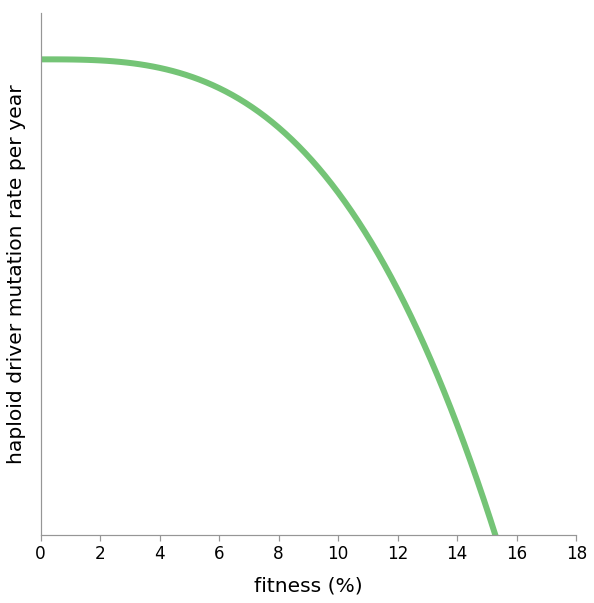

In [30]:
# plot DFE
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(8*scale, 8*scale))

s_vector = np.linspace(0, 0.22, 100)
DFE_vector = [np.log(DFE(s)) for s in s_vector]

ax1.plot(s_vector, DFE_vector, c = green3, lw = line_width, alpha = 1, zorder = 0)

ax1.set_xlim(0,0.18)
ax1.set_ylim(np.log(10**-6.5), np.log(10**-4.8))
ax1.set_xlabel('fitness (%)', fontsize = axislabelfont*1.35, labelpad = 12*scale, fontweight = 'medium')
ax1.set_ylabel('haploid driver mutation rate per year', fontsize = axislabelfont*1.35, labelpad = 12*scale, fontweight = 'medium')

x_major_ticks = [0, 0.02,0.04,0.06,0.08, 0.1,0.12,0.14, 0.16,0.18]
x_major_tick_labels = ["0","2","4","6","8","10","12","14","16", "18"]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = 14*1.2)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks = [np.log(0.000001), np.log(0.00001),np.log(0.0001)]
y_major_tick_labels = ["$10^{-6}$", "$10^{-5}$", "$10^{-4}$"]
y_major_ticks = [ ]
y_major_tick_labels = [ ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = 14*1.2)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(scale)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
        
# plt.savefig('DFE_v6_p3.pdf', bbox_inches='tight')
# plt.savefig('top10CHgenes_nonsyn_SNVs_DFE.pdf', bbox_inches='tight')

In [44]:
def logProbtheory_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p(l, list_of_ages, params, haploid_nonsyn_rate, N_tau, s_lower, s_upper, u_haploid_dev): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    s_peak = 0.0
    b = p
    d = q
#     driver rate
    haploid_driver_rate = params[0]
    s_max = float('inf')

    
    weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
#     print(s_max)
    normalization=integrate.quad(weight_s, 0.0, s_max)
    normalized_rho_s= lambda s: (1/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)
    
    def rho(s):
        result = 0
        for t in list_of_ages:

            result = result + 2*haploid_driver_rate*normalized_rho_s(s)*N_tau/(1-2*np.exp(l))*np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))/len(list_of_ages)
       
        return result

    driver_contrib = integrate.quad(rho, 0.0, s_max)[0]
    
    nonsyn_haploid_passenger_rate = haploid_nonsyn_rate - haploid_driver_rate
    
    if nonsyn_haploid_passenger_rate> 0:
        HH_contrib = 2*nonsyn_haploid_passenger_rate*linProbtheory_actual_ages_hitch(l, [haploid_driver_rate], N_tau, s_lower, s_upper, list_of_ages)
    else:
        HH_contrib = 0
        
    dev_contrib = linProbtheory_ages_dev_not_normalized(l, u_haploid_dev)
    
    return np.log(driver_contrib + dev_contrib + HH_contrib)

def logProbDataGivenModel_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p(params, list_of_ages, data, N_tau, s_lower, s_upper, haploid_nonsyn_rate, u_haploid_dev): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    total_square_distance = 0
    for datapoint in data:
        if np.exp(datapoint[0])<0.5:
            logfreq = datapoint[0]
            predicted_log_density = logProbtheory_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p(logfreq, list_of_ages,  params, haploid_nonsyn_rate, N_tau, s_lower, s_upper, u_haploid_dev)
            square_distance = ((datapoint[1] - predicted_log_density)**2)
            total_square_distance = total_square_distance + square_distance
                
    return total_square_distance 

def logProbtheory_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only(l, list_of_ages, params, haploid_nonsyn_rate, N_tau, s_lower, s_upper, u_haploid_dev, fraction_of_drivers_that_matters, s_tolerance): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    s_peak = 0.0
    b = p
    d = q
#     driver rate
    haploid_driver_rate = params[0]
    s_max = float('inf')

    
    weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
#     print(s_max)
    normalization=integrate.quad(weight_s, 0.0, s_max)[0]
    if normalization != 0:
        normalized_rho_s= lambda s: (1/normalization)*np.exp(-((abs(s-s_peak))/d)**b)
    else:
        normalized_rho_s = 0
    
    def rho(s):
        result = 0
        for t in list_of_ages:
#             no factor of 2 because data is normalized by 2mu
            result = result + 2*haploid_driver_rate*normalized_rho_s(s)*N_tau/(1-2*np.exp(l))*np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))/len(list_of_ages)
       
        return result

    driver_contrib = integrate.quad(rho, s_tolerance, s_max)[0]
    
    nonsyn_haploid_passenger_rate = haploid_nonsyn_rate - haploid_driver_rate*fraction_of_drivers_that_matters
    
    if nonsyn_haploid_passenger_rate> 0:
        HH_contrib = 2*nonsyn_haploid_passenger_rate*linProbtheory_actual_ages_hitch(l, [haploid_driver_rate], N_tau, s_tolerance, s_upper, list_of_ages)
    else:
        HH_contrib = 0
        
    dev_contrib = linProbtheory_ages_dev_not_normalized(l, u_haploid_dev)
    
    return np.log(driver_contrib + dev_contrib + HH_contrib)

def logProbDataGivenModel_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only(params, list_of_ages, data, N_tau, s_lower, s_upper, haploid_nonsyn_rate, u_haploid_dev, fraction_of_drivers_that_matters, s_tolerance): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    total_square_distance = 0
    for datapoint in data:
        if np.exp(datapoint[0])<0.5:
            logfreq = datapoint[0]
            predicted_log_density = logProbtheory_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only(logfreq, list_of_ages,  params, haploid_nonsyn_rate, N_tau, s_lower, s_upper, u_haploid_dev, fraction_of_drivers_that_matters, s_tolerance)
            square_distance = ((datapoint[1] - predicted_log_density)**2)
            total_square_distance = total_square_distance + square_distance
                
    return total_square_distance 


### Infer driver mutation rate of nonsyn SNVs in subsets of genes

In [ ]:
# this is variable
num_of_genes=291

In [35]:
# fit to Bolton including dev and HH contributions, considering 3.5% fitness or above

#Creating lists of the VAFs + VAF density lists (for MLE)   


top_x_gene_Bolton_nonsyn_SNV_vaf = top_x_gene_nonsyn_SNV_vaf_dict[num_of_genes]

Boltontotal=4160

# VAF densities lists
binmethod = 'doane'
n_bins_Bolton = 6

Bolton_top_x_genes_nonsyn_densities = lists_norm_VAFs_and_densities_no_normalization_by_panel(top_x_gene_Bolton_nonsyn_SNV_vaf, Boltontotal, n_bins_Bolton)

        
Bolton_top_x_genes_nonsyn_densities_without_inf = []    #remove the densities for the VAF bins for which there were no densities
for i in Bolton_top_x_genes_nonsyn_densities:
    if i[1] != -(float('inf')):
        Bolton_top_x_genes_nonsyn_densities_without_inf.append(i)




CCDS_of_top_x_genes = top_x_gene_CCDS_total_length[num_of_genes]

# This estimate is from Lee Six et al.
# NB:  if a mutation had mutant reads in greater than 120 out of 140 clonal
# colonies we considered it as germline
# Mutations that fell within 10 base pairs of each other or within 10 base pairs of
# indels were removed.
number_of_mutation_across_haploid_genome_per_cell_doubling = 1.84
# mappable genome size of GRCh37
haploid_genome_size = 2864785220
syn_total_mut_rate_ratio = 0.3090909090909091
Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix =  number_of_mutation_across_haploid_genome_per_cell_doubling*(CCDS_of_top_x_genes/haploid_genome_size)*(1-syn_total_mut_rate_ratio)
print('developmental mutation rate per cell doubling per haploid', Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix) 

nonsynonymous_mu_per_bp = 1.3475177304964539e-09
Bolton_top_x_nonsyn_rate = nonsynonymous_mu_per_bp*CCDS_of_top_x_genes


list_of_ages = list_of_Bolton_ages
initial_guess=[Bolton_top_x_nonsyn_rate]
outcome = scipy.optimize.minimize(logProbDataGivenModel_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only, initial_guess,\
                        args=(list_of_ages, Bolton_top_x_genes_nonsyn_densities_without_inf, N_tau, \
                              s_lower, s_upper, Bolton_top_x_nonsyn_rate, Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                             fraction_of_drivers_that_matters, s_tolerance), method='Nelder-Mead',\
                        options = {'maxiter': 10000, 'maxfev': 10000}) 

best_fit_nonsyn_driver_rate = outcome.x[0]

print('total nonsyn rate', Bolton_top_x_nonsyn_rate,'is larger than the best-fit nonsyn driver rate', best_fit_nonsyn_driver_rate)
print('The above statement is ', Bolton_top_x_nonsyn_rate > best_fit_nonsyn_driver_rate)
print('num_of_genes', num_of_genes)

Best-fit parameters from all nonsynonymous SNVs based on 291 genes is as following:
- 1) free 3-paramter fit: [1.19206955e-05, 4.32504536e+00, 1.07014291e-01]
- 2) fixed at p = 2, q = 0.1: haploid driver rate =  2.897283364151543e-06 (bad fit)
- 3) fixed at p = 3, q = 0.1: haploid driver rate = 7.726088971074757e-06  
- 4) fixed at p = 4, q = 0.1: haploid driver rate = 1.4263548869678495e-05
- 5) fixed at p = 5, q = 0.1: haploid driver rate = 2.0919871675529572e-05


# Stored results

In [36]:
# N tau = 1*10**5
# For driver analysis inclduing dev contrib and HH contrib (accounting for s=0-3.5% as passengers)

best_fit_nonsyn_driver_rate_top_x_genes = {}
best_fit_nonsyn_driver_rate_top_x_genes[1] =  2.860409574468083e-06
best_fit_nonsyn_driver_rate_top_x_genes[3] =  3.7821053856383055e-06 
best_fit_nonsyn_driver_rate_top_x_genes[5] = 4.119377493351005e-06  
best_fit_nonsyn_driver_rate_top_x_genes[10] =  4.763340425531794e-06 
best_fit_nonsyn_driver_rate_top_x_genes[20] = 5.309052734375117e-06  
best_fit_nonsyn_driver_rate_top_x_genes[30] = 5.582933344415052e-06  
best_fit_nonsyn_driver_rate_top_x_genes[50] =  6.178623296209841e-06 
best_fit_nonsyn_driver_rate_top_x_genes[100] = 6.983210605054371e-06  
best_fit_nonsyn_driver_rate_top_x_genes[291] = 7.726088971074757e-06  
best_fit_nonsyn_driver_rate_top_x_genes[468] = 7.3839245449640775e-06

total_nonsyn_rate_top_x_genes = {}
total_nonsyn_rate_top_x_genes[1] =  3.690851063829787e-06
total_nonsyn_rate_top_x_genes[3] =  1.4322765957446808e-05 
total_nonsyn_rate_top_x_genes[5] = 3.1956382978723404e-05  
total_nonsyn_rate_top_x_genes[10] = 4.763340425531915e-05 
total_nonsyn_rate_top_x_genes[20] =  0.0001156695744680851 
total_nonsyn_rate_top_x_genes[30] = 0.00021095659574468085  
total_nonsyn_rate_top_x_genes[50] = 0.00033564510638297874  
total_nonsyn_rate_top_x_genes[100] =  0.0006218093617021276 
total_nonsyn_rate_top_x_genes[291] =  0.001217156170212766  
total_nonsyn_rate_top_x_genes[468] =  0.0015352565957446808

best_fit_haploid_driver_rate = 2.531249999999855e-05

In [ ]:
# N tau = 5*10**4
# For driver analysis inclduing dev contrib and HH contrib (accounting for s=0-3.5% as passengers)
total_nonsyn_rate_top_x_genes[291] = 0.001217156170212766 
best_fit_nonsyn_driver_rate_top_x_genes[291] = 9.003865223983671e-06
total_nonsyn_rate_top_x_genes[100] = 0.0006218093617021276
best_fit_nonsyn_driver_rate_top_x_genes[100] = 8.136958444150114e-06
total_nonsyn_rate_top_x_genes[50] = 0.00033564510638297874 
best_fit_nonsyn_driver_rate_top_x_genes[50] = 7.276681017286969e-06
total_nonsyn_rate_top_x_genes[20] = 0.0001156695744680851
best_fit_nonsyn_driver_rate_top_x_genes[20] = 6.257904712433626e-06 
total_nonsyn_rate_top_x_genes[10] = 4.763340425531915e-05 
best_fit_nonsyn_driver_rate_top_x_genes[10] = 5.6564667553190305e-06
total_nonsyn_rate_top_x_genes[5] = 3.1956382978723404e-05
best_fit_nonsyn_driver_rate_top_x_genes[5] = 4.918287067819092e-06
total_nonsyn_rate_top_x_genes[3] = 1.4322765957446808e-05
best_fit_nonsyn_driver_rate_top_x_genes[3] = 4.475864361702134e-06
total_nonsyn_rate_top_x_genes[1] = 3.690851063829787e-06
best_fit_nonsyn_driver_rate_top_x_genes[1] = 3.402503324468084e-06


best_fit_haploid_driver_rate = 2.8242187499998558e-05

In [ ]:
# N tau = 2*10**5
# For driver analysis inclduing dev contrib and HH contrib (accounting for s=0-3.5% as passengers)
total_nonsyn_rate_top_x_genes[291] = 0.001217156170212766
best_fit_nonsyn_driver_rate_top_x_genes[291] = 6.894048620343373e-06
total_nonsyn_rate_top_x_genes[100] = 0.0006218093617021276
best_fit_nonsyn_driver_rate_top_x_genes[100] = 6.163442403591607e-06
total_nonsyn_rate_top_x_genes[50] = 0.00033564510638297874
best_fit_nonsyn_driver_rate_top_x_genes[50] = 5.45751076296516e-06
total_nonsyn_rate_top_x_genes[20] = 0.0001156695744680851
best_fit_nonsyn_driver_rate_top_x_genes[20] = 4.687780605884425e-06
total_nonsyn_rate_top_x_genes[10] = 4.763340425531915e-05 
best_fit_nonsyn_driver_rate_top_x_genes[10] = 4.167922872340303e-06  
total_nonsyn_rate_top_x_genes[5] = 3.1956382978723404e-05
best_fit_nonsyn_driver_rate_top_x_genes[5] = 3.595093085106323e-06
total_nonsyn_rate_top_x_genes[3] = 1.4322765957446808e-05 
best_fit_nonsyn_driver_rate_top_x_genes[3] = 3.3009499667553266e-06
total_nonsyn_rate_top_x_genes[1] = 3.690851063829787e-06
best_fit_nonsyn_driver_rate_top_x_genes[1] = 2.4913244680851035e-06


best_fit_haploid_driver_rate = 2.3378906249998543e-05

In [ ]:
# Different DFE shape :  p = 5, q = 0.1
best_fit_haploid_driver_rate_top_10_genes = 1.23177006e-05

In [ ]:
# Different DFE shape :  p = 1, q = 0.1
best_fit_haploid_driver_rate_top_10_genes = 4.83776762e-07

In [ ]:
# Different DFE shape :  p = 3, q = 0.05
best_fit_haploid_driver_rate_top_10_genes = 0.00244598

In [ ]:
# Different DFE shape :  p = 3, q = 0.15
best_fit_haploid_driver_rate_top_10_genes = 8.97778029e-07

## Best-fit nonsynonymous VAF spectra (figure S8, S11)

In [38]:
def plot_log_hist_data_for_plot_not_rescaled(study_VAFs, study_total, n_bins, lmin, lmax, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
    print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)

    axisfont=14*1.2
    axislabelfont=15*1.2
    tpfont = 14*1.2

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2

    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = color, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=3)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-3), 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
                  
    x_major_tick_labels =  [ "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)]
    y_major_ticks = [c-np.log(10**4) for c in y_major_ticks]
    y_major_tick_labels = ["" ,"", "", "", "", "", "", "", "", \
                           "$10^{-2}$","", "", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1

In [42]:
top_x_gene_dev_per_doubling_nonsyn_rate = {}
for x in [1,2,3,4,5,10, 20, 30, 291]:

    CCDS_of_top_x_genes = top_x_gene_CCDS_total_length[x]

    number_of_mutation_across_haploid_genome_per_cell_doubling = 1.84
    # mappable genome size of GRCh37
    haploid_genome_size = 2864785220
    syn_total_mut_rate_ratio = 0.3090909090909091
    Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix =  number_of_mutation_across_haploid_genome_per_cell_doubling*(CCDS_of_top_x_genes/haploid_genome_size)*(1-syn_total_mut_rate_ratio)


    top_x_gene_dev_per_doubling_nonsyn_rate[x] = Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix

hist without zero is [433, 297, 197, 136, 84, 62, 27]
log_hist_for_plot is [-1.48559251 -1.8625981  -2.27312651 -2.64367535 -3.12551344 -3.42919585
 -4.26049337]
errors is [(0.04925004969045199, 0.05977748389008952, 0.07391250662994686, 0.08965044817252954, 0.11553313184696767, 0.13581986861813622, 0.2137504174113296), (0.04693790993207214, 0.05640479941145027, 0.06882343712247563, 0.08227034087490726, 0.10355694080025124, 0.11955934774635546, 0.17601008942848217)]
Nonsyn_passengers_top_x_genes [1.4290769010148607, 1.3785434294122418, 1.304494623771952, 1.2081549010227504, 1.091799490479538, 0.9585673031262176, 0.8120525499720569, 0.6557811092719611, 0.49276000244311075, 0.3252551270598693, 0.15481374348097612, -0.017576656748985824, -0.19131707474810405, -0.36607125129672874, -0.5416815372909687, -0.718105366621064, -0.8953626436032527, -1.0734960529708368, -1.2525471116224673, -1.4325458130700313, -1.613508959391793, -1.7954433157471625, -1.9783515940076524, -2.162240057478115, -2.34

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in log


best_fit_spectrum [2.3852525600055348, 2.274722199068611, 2.1583645290972684, 2.035466341656118, 1.9062848677349755, 1.7719172278153172, 1.633984665899544, 1.4942367094544695, 1.3542161297167294, 1.2150803932925027, 1.0775790902378948, 0.9421175797558148, 0.8088367369776238, 0.6776783026044855, 0.5484369032101899, 0.4208071235661293, 0.2944286074245551, 0.1689273950560539, 0.0439512074006838, -0.08080260434634125, -0.20556768539644557, -0.33049964205158966, -0.45567872042898283, -0.5811238359634338, -0.7068151098823718, -0.8327197931349283, -0.9588155724991992, -1.0851060131271535, -1.2116260315505356, -1.3384384313585822, -1.4656251256021615, -1.593277037728605, -1.7214855589492772, -1.8503367619388218, -1.9799082361940303, -2.1102677964800867, -2.241473313818753, -2.3735731129822497, -2.5066071276017827, -2.6406086275896534, -2.77560747274218, -2.911635998905861, -3.048740250235498, -3.187002699094172, -3.326591760252958, -3.46788119259857, -3.6117844802717043, -3.760957655312909, -3

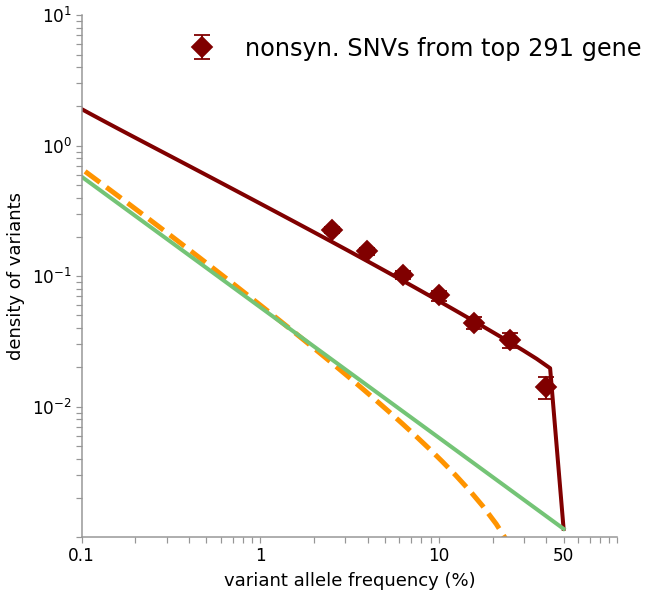

In [45]:
#Plotting the histogram
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(8*scale, 8*scale))


# fraction_of_drivers_that_matters = 0.6122039636083625

all468color = 'maroon'

n_bins_Bolton = 7
Boltonmarker = 'D'
lmin_Bolton = np.log(0.02)
lmax_Bolton = np.log(0.4999)


num_of_genes = 291
best_fit_nonsyn_driver_rate = best_fit_nonsyn_driver_rate_top_x_genes[num_of_genes]
Bolton_top_x_nonsyn_rate = total_nonsyn_rate_top_x_genes[num_of_genes]
Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix = top_x_gene_dev_per_doubling_nonsyn_rate[num_of_genes]

plot_log_hist_data_for_plot_not_rescaled(top_x_gene_nonsyn_SNV_vaf_dict[num_of_genes], Boltontotal,\
                                         n_bins_Bolton, lmin_Bolton, lmax_Bolton,\
                            'nonsyn. SNVs from top 291 gene ', Boltonmarker, Boltonmarkersize, 'maroon')


x=np.linspace(np.log(10**-4), np.log(0.49999999999), 50)

nonsyn_haploid_passenger_rate = Bolton_top_x_nonsyn_rate - best_fit_nonsyn_driver_rate
# Nonsyn_passengers_top_x_genes = [np.log(2*nonsyn_haploid_passenger_rate*linProbtheory_actual_ages_hitch(l, [best_fit_nonsyn_driver_rate], N_tau,\
#                                                                                           s_tolerance, s_upper, list_of_Bolton_ages)) for l in x]
ax1.plot(x, Nonsyn_passengers_top_x_genes, c = c3, lw = 5, linestyle='--')
print('Nonsyn_passengers_top_x_genes', Nonsyn_passengers_top_x_genes)


# fitted_VAF_fixed_DFE = [logProbtheory_driver(l, best_fit_nonsyn_driver_rate, N_tau, list_of_Bolton_ages) for l in x]
# ax1.plot(x, fitted_VAF_fixed_DFE, c = 'maroon', lw = line_width, alpha = 1, zorder = 0, label = 'nonsyn. drivers')
# print('fitted_VAF_fixed_DFE', fitted_VAF_fixed_DFE)




# early_developmentals_y=[np.log(linProbtheory_ages_dev_not_normalized(l, Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix)) for l in x]
ax1.plot(x, early_developmentals_y, c = green3, lw = 4)

best_fit_spectrum = [logProbtheory_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only(l, list_of_Bolton_ages, [best_fit_nonsyn_driver_rate], Bolton_top_x_nonsyn_rate, \
                                                                             N_tau, s_lower, s_upper, Bolton_top_x_dev_per_doubling_nonsynonymous_mu_LeeSix, fraction_of_drivers_that_matters, s_tolerance) for l in x] 
ax1.plot(x, best_fit_spectrum, c = 'maroon', lw = 4, alpha = 1, zorder = 0)
print('best_fit_spectrum', best_fit_spectrum)

# early_developmentals_and_hitchhiker_fixed = [np.log(np.exp(early_developmentals_y[i])+np.exp(fitted_VAF_fixed_DFE[i])) for i in range(len(early_developmentals_y))]



ax1.legend(bbox_to_anchor=(1.1, 1), frameon=0, fontsize = 12*2)
ax1.set_ylim(np.log(10**-3), np.log(10**1))

# plt.savefig('Driver_analysis_top_291_gene_p_is_3_best_fit_DFE_with_dev_contrib_and_HH_contrib.pdf', bbox_inches='tight')
plt.show()

In [50]:
# stored results

# top 1 gene
best_fit_spectrum = [-1.0470942044239637, -1.063678776921812, -1.0805806508202684, -1.0981341829883982, -1.116662627166597, -1.1364892705418945, -1.1579470838297388, -1.1813843376839543, -1.2071651427582781, -1.2356655980835693, -1.267267074705707, -1.3023478362852492, -1.3412733350206951, -1.3843849014872227, -1.4319864792314807, -1.4843294342019773, -1.5415961253065755, -1.6038837542647437, -1.6711908864466982, -1.743409685026007, -1.8203269725650122, -1.901636418434011, -1.986962339582313, -2.0758930055987674, -2.1680185466127977, -2.2629665320410015, -2.3604281255710093, -2.4601700688435275, -2.562032013069202, -2.665912998230501, -2.771753125204826, -2.8795159749912873, -2.989175057193114, -3.100705079075363, -3.214077169985994, -3.3292566142967814, -3.446201841518877, -3.564863931152823, -3.6851863672663523, -3.8071051177200967, -3.9305494331191677, -4.05544430637611, -4.1817168217100695, -4.30931198753273, -4.438233371741814, -4.568655857933351, -4.701284446375586, -4.838797920126384, -4.995102339574711, -12.560732400798342]
Nonsyn_passengers_top_x_genes = [-6.84826338163755, -6.8987968532396176, -6.9728456588797805, -7.069185381629103, -7.185540792172245, -7.318772979526121, -7.465287732679755, -7.621559173379954, -7.784580280208791, -7.952085155584574, -8.122526539170831, -8.294916939400899, -8.468657357400005, -8.6434115339491, -8.8190218199507, -8.995445649272991, -9.172702926247181, -9.35083633563122, -9.529887394274283, -9.709886095713832, -9.890849242051862, -10.072783598391306, -10.255691876667775, -10.439580340129982, -10.624466812075768, -10.810387657279668, -10.997403136823204, -11.185600018913243, -11.375092788511145, -11.56602388540679, -11.75856473645312, -11.952918780994047, -12.1493275352905, -12.348080603002485, -12.549530703261686, -12.754115566851233, -12.962389993628392, -13.175072324232362, -13.393117946821562, -13.617832009258116, -13.851056723864394, -14.09549395284308, -14.355295325721718, -14.637224076130101, -14.953168825591044, -15.326312439403026, -15.80924061473658, -16.554290699465408, -18.281111807633334, -inf]

# top 5 genes
best_fit_spectrum [-0.38184609133600417, -0.4283267136753165, -0.4734327220206113, -0.5175354358873829, -0.5608469702350901, -0.6035092216762551, -0.6456904213399514, -0.6876547517270601, -0.7297861695663785, -0.7725712119262397, -0.8165607686256094, -0.8623301701751743, -0.9104468409369867, -0.9614457192612111, -1.0158092296384231, -1.0739491836912074, -1.1361897152542546, -1.2027518625513665, -1.273741546439204, -1.34914349725691, -1.428823938595043, -1.512544200640298, -1.599985746686689, -1.690784562367623, -1.7845700885490077, -1.8810018409294915, -1.9797966649587733, -2.080741857562279, -2.1836936119389354, -2.2885644899636475, -2.3953058997569845, -2.5038911089653673, -2.6143020986115673, -2.7265210967188875, -2.8405259771731552, -2.9562881172515287, -3.073771488478835, -3.192932249581487, -3.3137185917977146, -3.436070904961909, -3.5599226746014208, -3.685203053471117, -3.811843344975319, -3.939792997341343, -4.069060402899072, -4.1998256474931965, -4.332798189152842, -4.4706526739074555, -4.627224949993553, -10.402217531853058]
Nonsyn_passengers_top_x_genes [-2.9713620731660475, -3.021895544768256, -3.095944350408785, -3.192284073158139, -3.3086394837013358, -3.4418716710547312, -3.5883864242083665, -3.7446578649091657, -3.9076789717378975, -4.075183847121093, -4.245625230699441, -4.418015630930103, -4.591756048929102, -4.7665102254776945, -4.942120511472652, -5.118544340802176, -5.295801617784247, -5.473935027153111, -5.652986085794838, -5.832984787251143, -6.013947933572793, -6.195882289919891, -6.378790568196373, -6.562679031659253, -6.7475655036043465, -6.933486348807097, -7.1205018283492585, -7.308698710437543, -7.4981914800360725, -7.689122576931964, -7.881663427964013, -8.076017472513072, -8.272426226810206, -8.471179294463099, -8.672629394679504, -8.87721425830573, -9.085488685075537, -9.29817101564585, -9.516216638248048, -9.740930700663425, -9.974155414157153, -10.218592644006259, -10.478394017121554, -10.760322763237477, -11.076267516526867, -11.449411129887357, -11.932339304323811, -12.677389385287501, -14.404210464423167, -inf]

# top 10 genes
best_fit_spectrum [-0.13630072876423038, -0.18991117537130003, -0.24233901902809415, -0.293888381419818, -0.3446372436258154, -0.3945558423467423, -0.44364190100195955, -0.49202370723773875, -0.5400011800219696, -0.5880281440125159, -0.6366624759222076, -0.6865119872001325, -0.7381904507633392, -0.7922851353320487, -0.8493318352408492, -0.9097937767919735, -0.9740428630744224, -1.0423434701179288, -1.114840223520884, -1.1915520384457732, -1.2723750445655169, -1.3570964724589922, -1.4454199532547547, -1.537000183997315, -1.6314821580178505, -1.7285381225203316, -1.8278952215585536, -1.9293490401597042, -2.032762475817341, -2.1380535982810946, -2.2451784445851173, -2.354114267730525, -2.4648465515852256, -2.577360649816879, -2.6916372545043767, -2.807650304104969, -2.9253661160787816, -3.044743017222378, -3.1657312295997846, -3.288273076683064, -3.412303928391157, -3.537754830357417, -3.6645590609562015, -3.7926682208731535, -3.9220931454120893, -4.053016717462339, -4.186151142141037, -4.324170291881437, -4.480879605566264, -10.003055187787913]
Nonsyn_passengers_top_x_genes [-2.3943074376460007, -2.4448409092481507, -2.5188897148883274, -2.61522943763805, -2.7315848481812357, -2.864817035534596, -3.011331788688281, -3.1676032293885035, -3.330624336211163, -3.498129211600951, -3.668570595179359, -3.840960995409451, -4.014701413409003, -4.189455589957553, -4.365065875959224, -4.541489705273592, -4.7187469822641495, -4.896880391639663, -5.075931450274754, -5.255930151722379, -5.436893298054051, -5.618827654399745, -5.801735932676292, -5.985624396138572, -6.170510868084337, -6.356431713286964, -6.5434471928289835, -6.7316440749165904, -6.9211368445150905, -7.1120679414073145, -7.304608792453439, -7.498962836990694, -7.695371591285544, -7.894124658939826, -8.095574759157612, -8.30015962277664, -8.508434049522398, -8.721116380092253, -8.93916200262995, -9.163876065065987, -9.397100778629472, -9.641538008358255, -9.90133937607549, -10.183268121412045, -10.49921287635553, -10.872356494187606, -11.355284668680765, -12.100334749396305, -13.82715582701905, -inf]


Nonsyn_passengers_top_x_genes [-6.84826338163755, -6.8987968532396176, -6.9728456588797805, -7.069185381629103, -7.185540792172245, -7.318772979526121, -7.465287732679755, -7.621559173379954, -7.784580280208791, -7.952085155584574, -8.122526539170831, -8.294916939400899, -8.468657357400005, -8.6434115339491, -8.8190218199507, -8.995445649272991, -9.172702926247181, -9.35083633563122, -9.529887394274283, -9.709886095713832, -9.890849242051862, -10.072783598391306, -10.255691876667775, -10.439580340129982, -10.624466812075768, -10.810387657279668, -10.997403136823204, -11.185600018913243, -11.375092788511145, -11.56602388540679, -11.75856473645312, -11.952918780994047, -12.1493275352905, -12.348080603002485, -12.549530703261686, -12.754115566851233, -12.962389993628392, -13.175072324232362, -13.393117946821562, -13.617832009258116, -13.851056723864394, -14.09549395284308, -14.355295325721718, -14.637224076130101, -14.953168825591044, -15.326312439403026, -15.80924061473658, -16.554290699

In [38]:
# # Stored results for different parametrized DFE

# p = 5, q = 0.1
Nonsyn_passengers_top_x_genes = [-2.334232779752365, -2.3547007064646923, -2.3989448009281054, -2.4670414956691964, -2.558071216024056, -2.6700443254925297, -2.800031273958484, -2.944523829756584, -3.0999461546578746, -3.26313854882506, -3.431645103864063, -3.603759640490296, -3.7784129469311516, -3.955013991227385, -4.133305621213842, -4.313244734599869, -4.494905013262134, -4.678405845214295, -4.863869860431356, -5.051403909803845, -5.241094581634832, -5.433011639851579, -5.6272162092614595, -5.823771998332829, -6.022757575764409, -6.224277990392193, -6.42847354046897, -6.635524750573436, -6.845654322683978, -7.059127255675811, -7.276251505071733, -7.497381317965478, -7.7229249764678185, -7.953358330414562, -8.189245665185776, -8.431270396764273, -8.68027961076858, -8.937347790200207, -9.20388014432067, -9.481763440933292, -9.773620699797107, -10.083241426792595, -10.4163641354033, -10.78220363697909, -11.19673387229414, -11.690707658799079, -12.333157664646137, -13.322976176229364, -15.605447818651971, -float('inf')]
best_fit_spectrum = [0.5730901825461308, 0.5437055771902224, 0.514291005422341, 0.48435544148125464, 0.4535719214024263, 0.4217349868587765, 0.38869159138534554, 0.3542670762820573, 0.31821073738528793, 0.2801754173530885, 0.23972875906357893, 0.19638205154115354, 0.14962226871975412, 0.0989399383568692, 0.04385209196455328, -0.016077911231395313, -0.08122231395175038, -0.15187257058061274, -0.22822579626014214, -0.31037619472939604, -0.398314118183074, -0.4919351104936021, -0.5910599651856561, -0.6954646205591302, -0.8049160882600611, -0.9192083909791758, -1.0381917246976418, -1.1617896271820745, -1.290002631662065, -1.4229011408735266, -1.560613023186649, -1.7033116653914295, -1.8512085230712105, -2.0045520201371656, -2.1636331224426724, -2.328797513317507, -2.500464980885379, -2.6791581623003804, -2.865545174135523, -3.0605043161673855, -3.265225681393599, -3.481377362952868, -3.7113914431574915, -3.9589883856635333, -4.230220819492607, -4.535792362467398, -4.897074790593878, -5.365976032432841, -6.127827705052967, -10.003055187803904]

# p = 1, q = 0.1
Nonsyn_passengers_top_x_genes [-2.004144715907281, -2.1386273994468215, -2.2855619920805603, -2.442074122164146, -2.6054046019258923, -2.7731907213212574, -2.9436402593108086, -3.11555234471357, -3.2882178503513875, -3.4612580861205964, -3.6344838097913, -3.80779957784134, -3.9811536123595395, -4.154515725519031, -4.327867973350765, -4.501199644812073, -4.674503619173164, -4.847773687047269, -5.021002966471685, -5.194183284076118, -5.36730519763283, -5.540358376724722, -5.71333223022431, -5.886216682672128, -6.059002987388491, -6.231684448901289, -6.404257418802377, -6.576721759498766, -6.749081803803018, -6.921347295057693, -7.093534872886743, -7.265669806725079, -7.43778926666767, -7.609945976086088, -7.782214062071333, -7.954697165283905, -8.1275403541436, -8.300948013728508, -8.475211539492268, -8.650753791107439, -8.828203470928447, -9.00852566314748, -9.193264786591964, -9.385030197100079, -9.588560263322412, -9.813354873178413, -10.081411569964494, -10.456919522852125, -11.234757501556627, -float('inf')]
best_fit_spectrum [-0.8503797777578618, -0.9840313137303156, -1.1180210568401507, -1.2510374735249086, -1.3817647035412088, -1.509052312247095, -1.6320150768838233, -1.7500546630218352, -1.8628281444755859, -1.9701943143553944, -2.072166400460691, -2.1688769466262148, -2.2605516663785585, -2.3474857695552322, -2.4300190617195376, -2.508509476346503, -2.583306819249127, -2.654729355983133, -2.7230458944487026, -2.7884654987882413, -2.8511360010835687, -2.9111510904943616, -2.9685641521863544, -3.0234055800597024, -3.0756994882561868, -3.125475960943282, -3.172776301330947, -3.217650715259948, -3.260149959159417, -3.300313555119574, -3.3381571283755624, -3.3736603416404134, -3.406755615810188, -3.4373167141143446, -3.4651457041290867, -3.489956396657935, -3.5113518747615418, -3.5287929701058127, -3.5415527143559378, -3.548648757303961, -3.548739766334362, -3.5399602641553547, -3.5196443058815126, -3.4838343629165354, -3.426337875163816, -3.3367165955395284, -3.195324725558329, -2.9579428329059714, -2.4831955715035705, 16.751365430759183]

# p = 1, q = 0.05
Nonsyn_passengers_top_x_genes [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -inf]
best_fit_spectrum [4.8224559754649095, 4.807605054931271, 4.790398154196987, 4.770454235218768, 4.747343213068721, 4.720581100401989, 4.689625203625062, 4.65386959333856, 4.61264109911496, 4.565196088563371, 4.510718342056626, 4.448318500686305, 4.377035870467937, 4.295843764732041, 4.203659969522176, 4.099364190810633, 3.981824296617871, 3.8499326351044747, 3.702652678643591, 3.539074820871856, 3.358478363764832, 3.160394385862135, 2.9446610127773445, 2.7114588154721404, 2.4613112298081443, 2.1950364367932167, 1.9136465762976695, 1.618206956337044, 1.3096846697642825, 0.9888221050951924, 0.6560611344677304, 0.31152339159203474, -0.044968354961242636, -0.4138546269555265, -0.7958165720929894, -1.191784338768269, -1.6029836030521247, -2.0310221667325754, -2.4780225262600704, -2.946817819617468, -3.4412462920410665, -3.9666075492437973, -4.530393505211784, -5.14349619036304, -5.822234110285714, -6.591570924534235, -7.488094036751251, -8.542099250007542, -9.585007852506054, -10.003055187803904]

# p = 1, q = 0.15
Nonsyn_passengers_top_x_genes [-2.246662676360412, -2.340897543573334, -2.456379195752064, -2.589997547618409, -2.7379141655068016, -2.8961157231438754, -3.061012998586553, -3.2298537466278496, -3.400827645323908, -3.57289355034617, -3.745512835338784, -3.918419686188807, -4.091481634790226, -4.264631754486003, -4.437838583202895, -4.611090973997744, -4.784388437817808, -4.957734683832079, -5.1311340136489285, -5.304589990183724, -5.478105544086537, -5.6516838998010055, -5.82533000358154, -5.9990522634073224, -6.1728644184714065, -6.346787486439271, -6.520850860600109, -6.695094991782633, -6.869571915517345, -7.044347513000758, -7.21950445110611, -7.395145200246838, -7.571397822519985, -7.748423102925707, -7.926424941205803, -8.105665250018044, -8.286485304542298, -8.469338501472256, -8.654839486322807, -8.843843505083251, -9.037577664792355, -9.237869636901292, -9.447570120250232, -9.671392079392678, -9.917741323784789, -10.203240883958328, -10.566082943809242, -11.11806134963596, -12.389848359172083, -float('inf')]
best_fit_spectrum [-0.7765024955827456, -0.8828726878199564, -0.9892983804664645, -1.0948951049415678, -1.198455977233706, -1.2987638913314095, -1.394861417007773, -1.4861906984425375, -1.5725947377600948, -1.6542308919628295, -1.7314670400846035, -1.8047963791779733, -1.8747776219049936, -1.9419923203652176, -2.007011361163738, -2.0703669959695414, -2.1325298461696285, -2.1938915996308017, -2.2547544318381587, -2.3153280624262536, -2.37573488875533, -2.4360227554390326, -2.496183698987551, -2.556175760015847, -2.6159441250469695, -2.6754378611419636, -2.7346195125569097, -2.793466784540152, -2.8519674375367607, -2.910110093105206, -2.9678736844346765, -3.025217429319931, -3.082071959054084, -3.1383310831719204, -3.1938430847435657, -3.2484001261741575, -3.301724127975521, -3.35344705657533, -3.4030825801843445, -3.4499842085362773, -3.4932814616484875, -3.531778702788994, -3.5637869692190947, -3.5868272364629386, -3.5970651325652976, -3.5881182327909396, -3.548149503938482, -3.4510177627510914, -3.215589006186315, -2.1187743084914996]


fitted_VAF_fixed_DFE [-0.7093008806258401, -0.7284773836339579, -0.7505877173232985, -0.7759860702837651, -0.8050334029400795, -0.838083735728901, -0.8754659993614182, -0.9174614957431245, -0.9642779347404365, -1.0160223947000726, -1.0726772825814097, -1.1340850339768158, -1.199948116366442, -1.2698497947645027, -1.3432971132520724, -1.4197806975672935, -1.4988384122318918, -1.5801057525712072, -1.663339040338523, -1.7484080463505416, -1.8352670440839116, -1.9239198282582557, -2.01439154337287, -2.106712023065019, -2.200908473097346, -2.2970031613186594, -2.395012957128496, -2.494949313762908, -2.5968182830136266, -2.7006204863407337, -2.8063510356903967, -2.913999404370658, -3.023549248024427, -3.1349781756174786, -3.2482574721928326, -3.363351780043339, -3.4802187557687576, -3.598808743480533, -3.7190645524351766, -3.840921530482206, -3.964308352726066, -4.089149470973103, -4.215371453016674, -4.342918807443226, -4.471794622131988, -4.602173361364073, -4.7347598812183955, -4.87223419